In [3]:
# Import libraries

import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import differential_evolution
from joblib import Parallel, delayed

# 2HDM with $Z_2$ symmetry

In [4]:
dim = 1000 # Number of (pseudo-)random numbers.

# The idea is to generate some (pseudo-)random numbers so as to find which combination is valid, in light of the analysis presented in the Master' Thesis associated with this code.

rho_3 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_4 = np.random.default_rng().uniform(-5,5,dim) # Only values from -5 to 5 are studied here. This parameter can be changed as desired.

rho_5 = np.random.default_rng().uniform(0,5,dim) # rho_5 is |rho_5|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

gamma = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_5.

In [5]:
def search_minimum_values(rho_3_param,rho_4_param,rho_5_param,dim_parameter,epsilon):

    # This function finds the valid values for the parameters of the 2HDM potential.

    r2 = np.linspace(0,1,200) # r2 is r^2, which takes values from 0 to 1.
    cosine_gamma_plus_beta = np.linspace(-1,1,200) # cosine_gamma_plus_beta is cos(γ+β), whose values vary from -1 to 1.
    x = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    y = np.linspace(0,5,200) # Only the first quadrant is studied. The upper limit (5 for this quadrant) and the number of points (200) can be changed.
    #
    rho_3_eff_min_valid = []
    rho_3_eff = np.zeros((len(r2),len(cosine_gamma_plus_beta)))
    rho_3_eff_min = np.zeros(dim_parameter)
    #
    for k in range(0,dim_parameter):
        #
        for i in range(0,len(r2)):
            for j in range(0,len(cosine_gamma_plus_beta)):
                rho_3_eff[i,j] = rho_3_param[k]+r2[i]*(rho_4_param[k]+rho_5_param[k]*cosine_gamma_plus_beta[j])
        #
        rho_3_eff_min[k] = np.min(rho_3_eff)
        V = (1/2)*x**2+(1/2)*y**2+rho_3_eff_min[k]*x*y
        #
        if np.min(V) >= -epsilon: ##The minus sign is to include 0.
            rho_3_eff_min_valid.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(rho_3_eff_min[k])])
            
            # It is possible to use the following code in order to work with np.float64:
            # rho_3_eff_min_valid.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],rho_3_eff_min[k]])
    #
    if not rho_3_eff_min_valid == []:
        return rho_3_eff_min_valid # First element: rho_3, Second element: rho_4, Third element: |rho_5|, Fourth element: rho_3_eff_min.
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')

In [6]:
# Results

valid_values = search_minimum_values(rho_3,rho_4,rho_5,dim,10**(-5))
valid_values

[[4.96115928209375, 4.7561383476667025, 4.57397426177158, 4.96115928209375],
 [0.014446765889174706,
  4.994942220802834,
  1.998344018332192,
  0.014446765889174706],
 [1.8619529558281753,
  2.898766904320336,
  3.2750861341390873,
  1.4856337260094241],
 [2.115672649569907, 4.938324687500023, 3.339978040471264, 2.115672649569907],
 [0.3854664955304301,
  1.2580910765284656,
  0.6659750785322494,
  0.3854664955304301],
 [3.5019809114892695,
  -2.0408882561730457,
  0.5158315770289529,
  0.9452610782872708],
 [4.929559409575839,
  -3.2698789756765034,
  2.4653050960380094,
  -0.8056246621386736],
 [4.1582217207795065,
  0.9493982855425367,
  4.468680999487934,
  0.638939006834109],
 [3.393010187349603, 2.2753412120649985, 0.947145964759652, 3.393010187349603],
 [3.163656582137797,
  -3.194782252218692,
  0.9192590915052634,
  -0.9503847615861583],
 [4.9995499964577, 2.5952587977326713, 0.3483314317910191, 4.9995499964577],
 [3.129033019671329, 1.6241465863763587, 1.214365154104005, 3.1

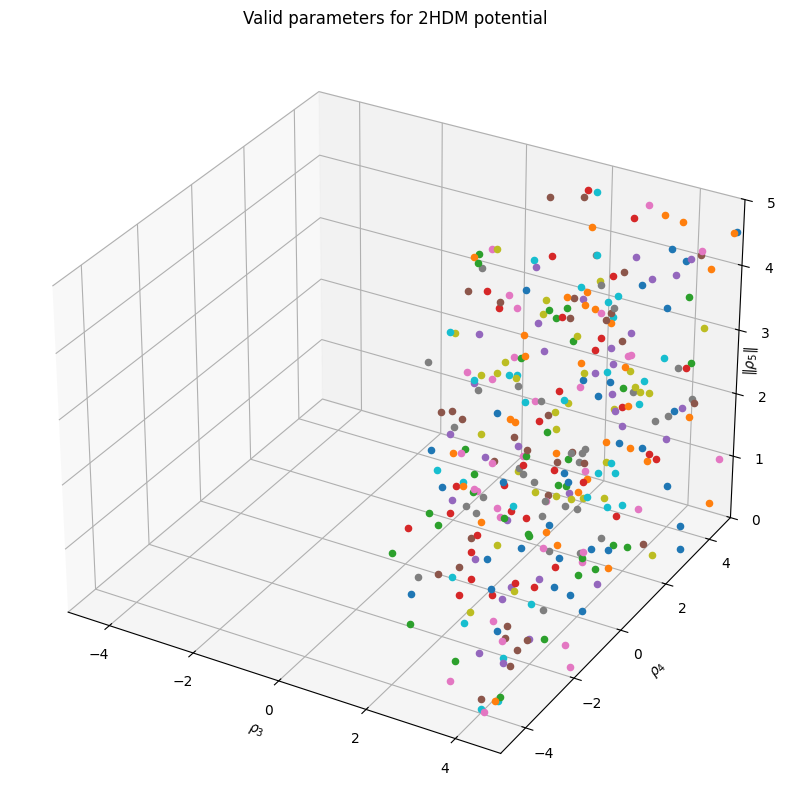

In [7]:
# Plot of the results

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(valid_values)-1,len(valid_values)):
    #
    ax.scatter(valid_values[int(point)][0],valid_values[int(point)][1],valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential')

plt.show()

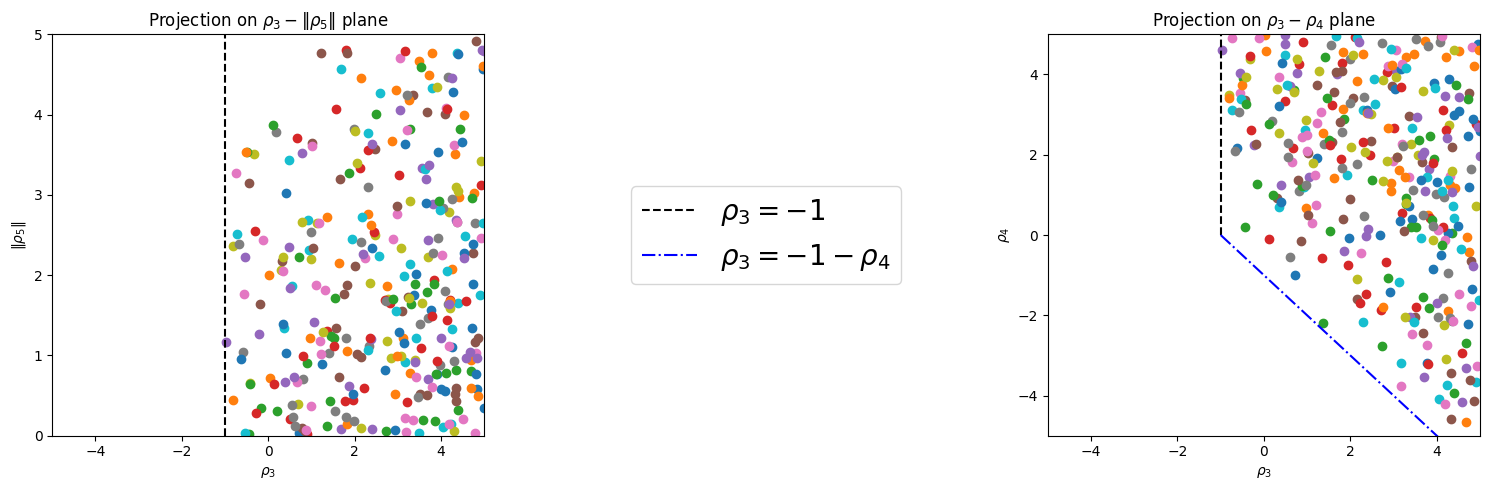

In [8]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\|\rho_{5}\|$')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

for point in np.linspace(0, len(valid_values)-1, len(valid_values)):
    ax.scatter(valid_values[int(point)][0], valid_values[int(point)][1])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [9]:
# Check!

search_minimum_values([0],[0],[0],1,10**(-5))

# As rho_3=rho_4=rho_5=0, then rho_3_eff_min=0, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[0.0, 0.0, 0.0, 0.0]]

In [10]:
# Check!

search_minimum_values([-2],[0],[0],1,10**(-5))

# As rho_3=-2 and rho_4=rho_5=0, then rho_3_eff_min=-2, which is NOT greater than -1, so this values are NOT valid (Error message arises).

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [11]:
# Check!

search_minimum_values([1],[0],[0],1,10**(-5))

# As rho_3=1 and rho_4=rho_5=0, then rho_3_eff_min=1, which is greater than -1, so this values are valid (Hence, they are shown hereinbelow).

[[1.0, 0.0, 0.0, 1.0]]

# 2HDM without $Z_2$ symmetry

In [12]:
dim = 100

# Same parameters as above.

rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)

rho_6 = np.random.default_rng().uniform(0,5,dim) # rho_6 is |rho_6|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 # Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

alpha = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_6.

rho_7 = np.random.default_rng().uniform(0,5,dim) # rho_7 is |rho_7|, a modulus. Hence, its values cannot be smaller than zero. 
                                                 #Nevertheless, the code might also arise valid results if the minimun is changed to a negative value.

xi = np.random.default_rng().uniform(0,2*np.pi,dim) # Phase of rho_7.

In [13]:
def search_minimum_values_for_Z2_violating_2HDM(rho_3_param,rho_4_param,rho_5_param,gamma_param,rho_6_param,alpha_param,rho_7_param,xi_param,dim_param,epsilon_2):

    # The idea here is similar to the previous one but with much more parameters.

    r = np.linspace(0,1,50)
    beta = np.linspace(0,4*np.pi,50)
    chi = np.linspace(0,np.pi/2,50)
    #
    minimum_for_all = []
    V = np.zeros((len(r),len(beta),len(chi)))
    #
    for k in range(0,dim_param):
        #
        for i in range(0,len(r)):
            for j in range(0,len(beta)):
                for w in range(0,len(chi)):
                    V[i,j,w] = 2+((rho_3_param[k]+r[i]**2*(rho_4_param[k]+np.abs(rho_5_param[k])*np.cos(gamma_param[k]+beta[j])))-1)*(np.sin(2*chi[w]))**2+np.sin(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_param[k]+(1/2)*beta[j])+np.abs(rho_7_param[k])*r[i]*np.cos(xi_param[k]+(1/2)*beta[j])+np.cos(2*chi[w])*(np.abs(rho_6_param[k])*r[i]*np.cos(alpha_param[k]+(1/2)*beta[j])-np.abs(rho_7_param[k])*r[i]*np.cos(xi_param[k]+(1/2)*beta[j])))
        #
        if np.min(V) >= -epsilon_2:
            minimum_for_all.append([float(rho_3_param[k]),float(rho_4_param[k]),float(rho_5_param[k]),float(gamma_param[k]),float(rho_6_param[k]),float(alpha_param[k]),float(rho_7_param[k]),float(xi_param[k]),float(np.min(V))])
            
             # It is possible to use the following code in order to work with np.float64:
             # minimum_for_all.append([rho_3_param[k],rho_4_param[k],rho_5_param[k],gamma_param[k],rho_6_param[k],alpha_param[k],rho_7_param[k],xi_param[k],np.min(V)])
    #
    if not minimum_for_all == []:
        return minimum_for_all
    else:
        return print('No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.')
    

In [14]:
# Results

search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))

[[2.9467039879745007,
  4.6675163467188785,
  0.5777989807380235,
  3.825363562816525,
  2.4214898855769835,
  4.188470077077436,
  0.02590207663260624,
  1.8025228453070112,
  1.1586206412601043],
 [4.7363107763462935,
  2.832859920035677,
  3.4935042608311613,
  6.222657936293156,
  3.430074671304287,
  3.0731303836729276,
  2.605032751092961,
  4.969228605057778,
  0.4195320937457936],
 [1.8090272022515048,
  1.4455684363612056,
  2.1002960251557488,
  1.6151311354680828,
  1.8376985941017714,
  0.43042448193756594,
  1.434072884862347,
  0.25430917497642785,
  0.2880249924104241],
 [4.081342741169321,
  3.0086652157745917,
  0.6550924447754819,
  0.7142635732477938,
  2.4354993645328977,
  6.259841230037342,
  1.3420697621220996,
  2.4878738898120596,
  1.1713462969444246],
 [4.712644020766545,
  1.9906947633707537,
  2.6475275293500666,
  2.736593950703529,
  0.6983286779596676,
  0.0284853293661257,
  2.026328665660993,
  4.970341811867423,
  1.3748744848932877],
 [0.908070746345

In [15]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([0],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([0],[0],[0],1,10**(-5))

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0010273036248318]]

In [16]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([-2],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([-2],[0],[0],1,10**(-5))

# NOTE: This code might consider rho_3=-1 as a valid value because it is a limit case

No valid values have been found. Try to generate new (pseudo-)random numbers or try to input another desired values.


In [17]:
# Check!

search_minimum_values_for_Z2_violating_2HDM([1],[0],[0],[0],[0],[0],[0],[0],1,10**(-5))

# Same case as search_minimum_values([1],[0],[0],1,10**(-5))

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]]

In [18]:
# Due to the fact that this method implies a heavy calculation, another method is presented below.

name_parameter = ['rho_3', 'rho_4', 'rho_5', 'gamma', 'rho_6', 'alpha', 'rho_7', 'xi']
name_function_variables = ['r', 'beta', 'chi']
num_parameter = len(name_parameter)
num_functiion_variables = len(name_function_variables)


function_variable_regions = [(0, 1),         # r
                             (0, 4*np.pi),   # beta
                             (0, np.pi/2)]   # chi

def generate_random_free_params(number, limits):

    limits = np.array(limits)  
    lower_limit = limits[:, 0]  
    upper_limit = limits[:, 1]  

    return np.random.uniform(lower_limit, upper_limit, size=(number, len(limits)))

# Define the Z2-violating potential
def V_Z2_less(parameters, function_variables):
    rho_3_param, rho_4_param, rho_5_param, gamma_param, rho_6_param, alpha_param, rho_7_param, xi_param = parameters
    r, beta, chi = function_variables
    return 2+((rho_3_param+r**2*(rho_4_param+np.abs(rho_5_param)*np.cos(gamma_param+beta)))-1)*(np.sin(2*chi))**2+np.sin(2*chi)*(np.abs(rho_6_param)*r*np.cos(alpha_param+(1/2)*beta)+np.abs(rho_7_param)*r*np.cos(xi_param+(1/2)*beta)+np.cos(2*chi)*(np.abs(rho_6_param)*r*np.cos(alpha_param+(1/2)*beta)-np.abs(rho_7_param)*r*np.cos(xi_param+(1/2)*beta)))

# Minimize the potential in (r, beta, chi) space
def minimize_dependent_params(parameters, bounds):
    def minimize_single(parameter):
        def objective(function_variables):
            return V_Z2_less(parameter, function_variables)
        
        # Scipy native function
        res = differential_evolution(objective, bounds=bounds, strategy='best1bin', tol=1e-6)
        return np.concatenate([parameter, res.x, [res.fun]])

    # Parallel processing
    results = Parallel(n_jobs=-1)(delayed(minimize_single)(parameter) for parameter in parameters)
    
    return results

In [19]:
# We first test this method for the Z_2-conserving potential

dim = 10000

regions = [(-5, 5),         # rho_3
           (-5, 5),         # rho_4
           (0, 5),          # |rho_5|
           (0, 2*np.pi),    # gamma
           (0, 0),          # |rho_6|
           (0, 0),    # alpha
           (0, 0),          # |rho_7|
           (0, 0)]    # xi

# Generate random parameters
parameters = generate_random_free_params(dim, regions)

# Minimize the function and filter the results with V > 0
results = np.array(minimize_dependent_params(parameters, function_variable_regions))
new_valid_values = results[results[:, -1] > 0]

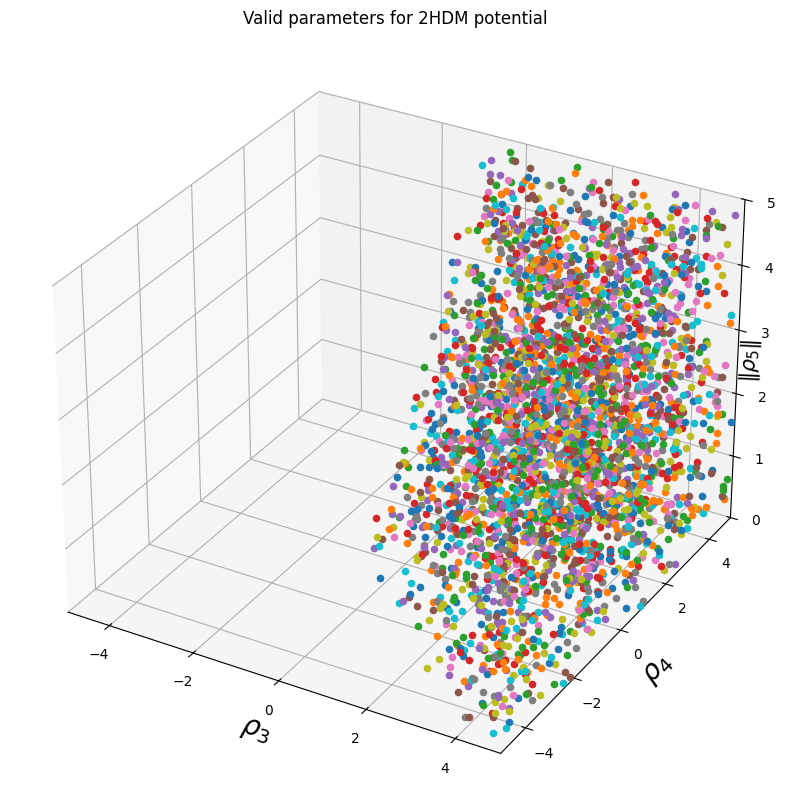

In [20]:
# Plot of the results


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(new_valid_values)-1,len(new_valid_values)):
    #
    ax.scatter(new_valid_values[int(point)][0],new_valid_values[int(point)][1],new_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_zlabel(r'$\|\rho_{5}\|$',fontsize=15, rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title('Valid parameters for 2HDM potential')

plt.show()

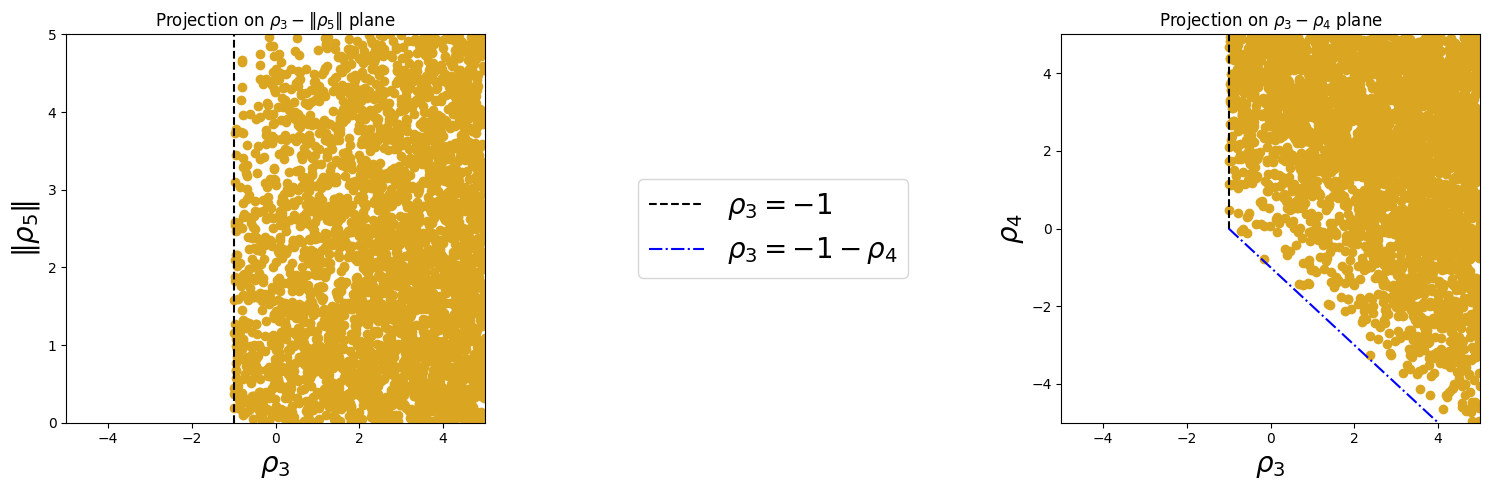

In [21]:
# Projection on different planes

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)

ax.scatter(new_valid_values[:,0], new_valid_values[:,2],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
ax.set_title(r'Projection on $\rho_{3}-\|\rho_{5}\|$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(133)

ax.scatter(new_valid_values[:,0], new_valid_values[:,1],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_title(r'Projection on $\rho_{3}-\rho_{4}$ plane')

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax2 = fig.add_subplot(132)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center',fontsize=20)
ax2.axis('off')


plt.tight_layout()
plt.show()

In [50]:
# Explore Z_2-violating 2HDM results

dim = 10000

regions = [(-5, 5),         # rho_3
           (-5, 5),         # rho_4
           (0, 5),          # |rho_5|
           (0, 2*np.pi),    # gamma
           (0, 5),          # |rho_6|
           (0, 2*np.pi),    # alpha
           (0, 5),          # |rho_7|
           (0, 2*np.pi)]    # xi

# Generate random parameters
parameters = generate_random_free_params(dim, regions)

# Minimize the function and filter the results with V > 0
results = np.array(minimize_dependent_params(parameters, function_variable_regions))
Z2_violating_valid_values = results[results[:, -1] > 0]

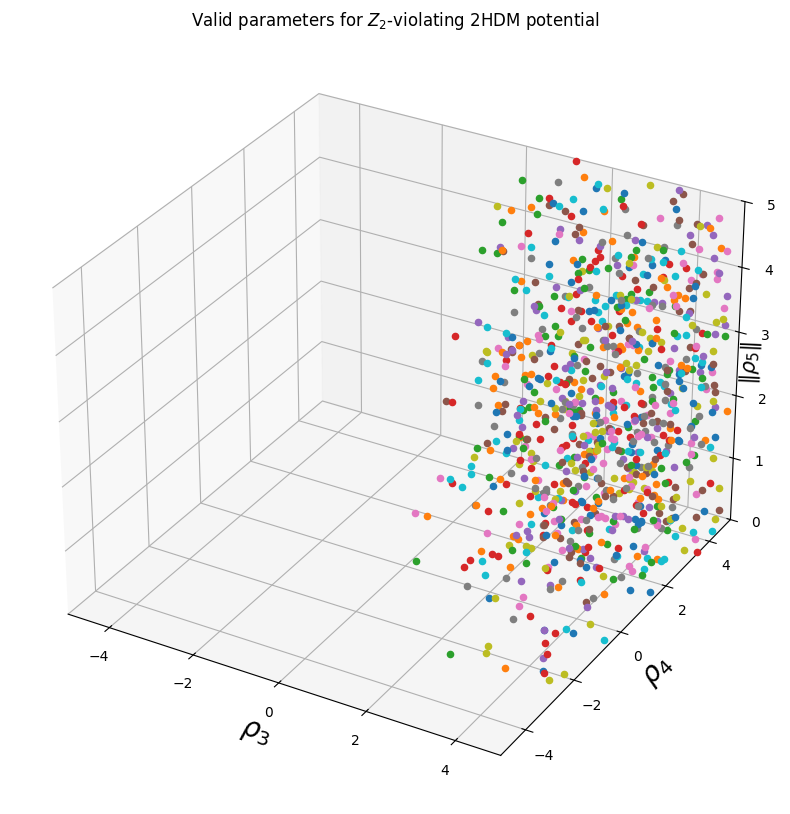

In [66]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(Z2_violating_valid_values)-1,len(Z2_violating_valid_values)):
    ax.scatter(Z2_violating_valid_values[int(point)][0],Z2_violating_valid_values[int(point)][1],Z2_violating_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_zlabel(r'$\|\rho_{5}\|$',fontsize=15, rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title(r'Valid parameters for $Z_2$-violating 2HDM potential')

plt.show()

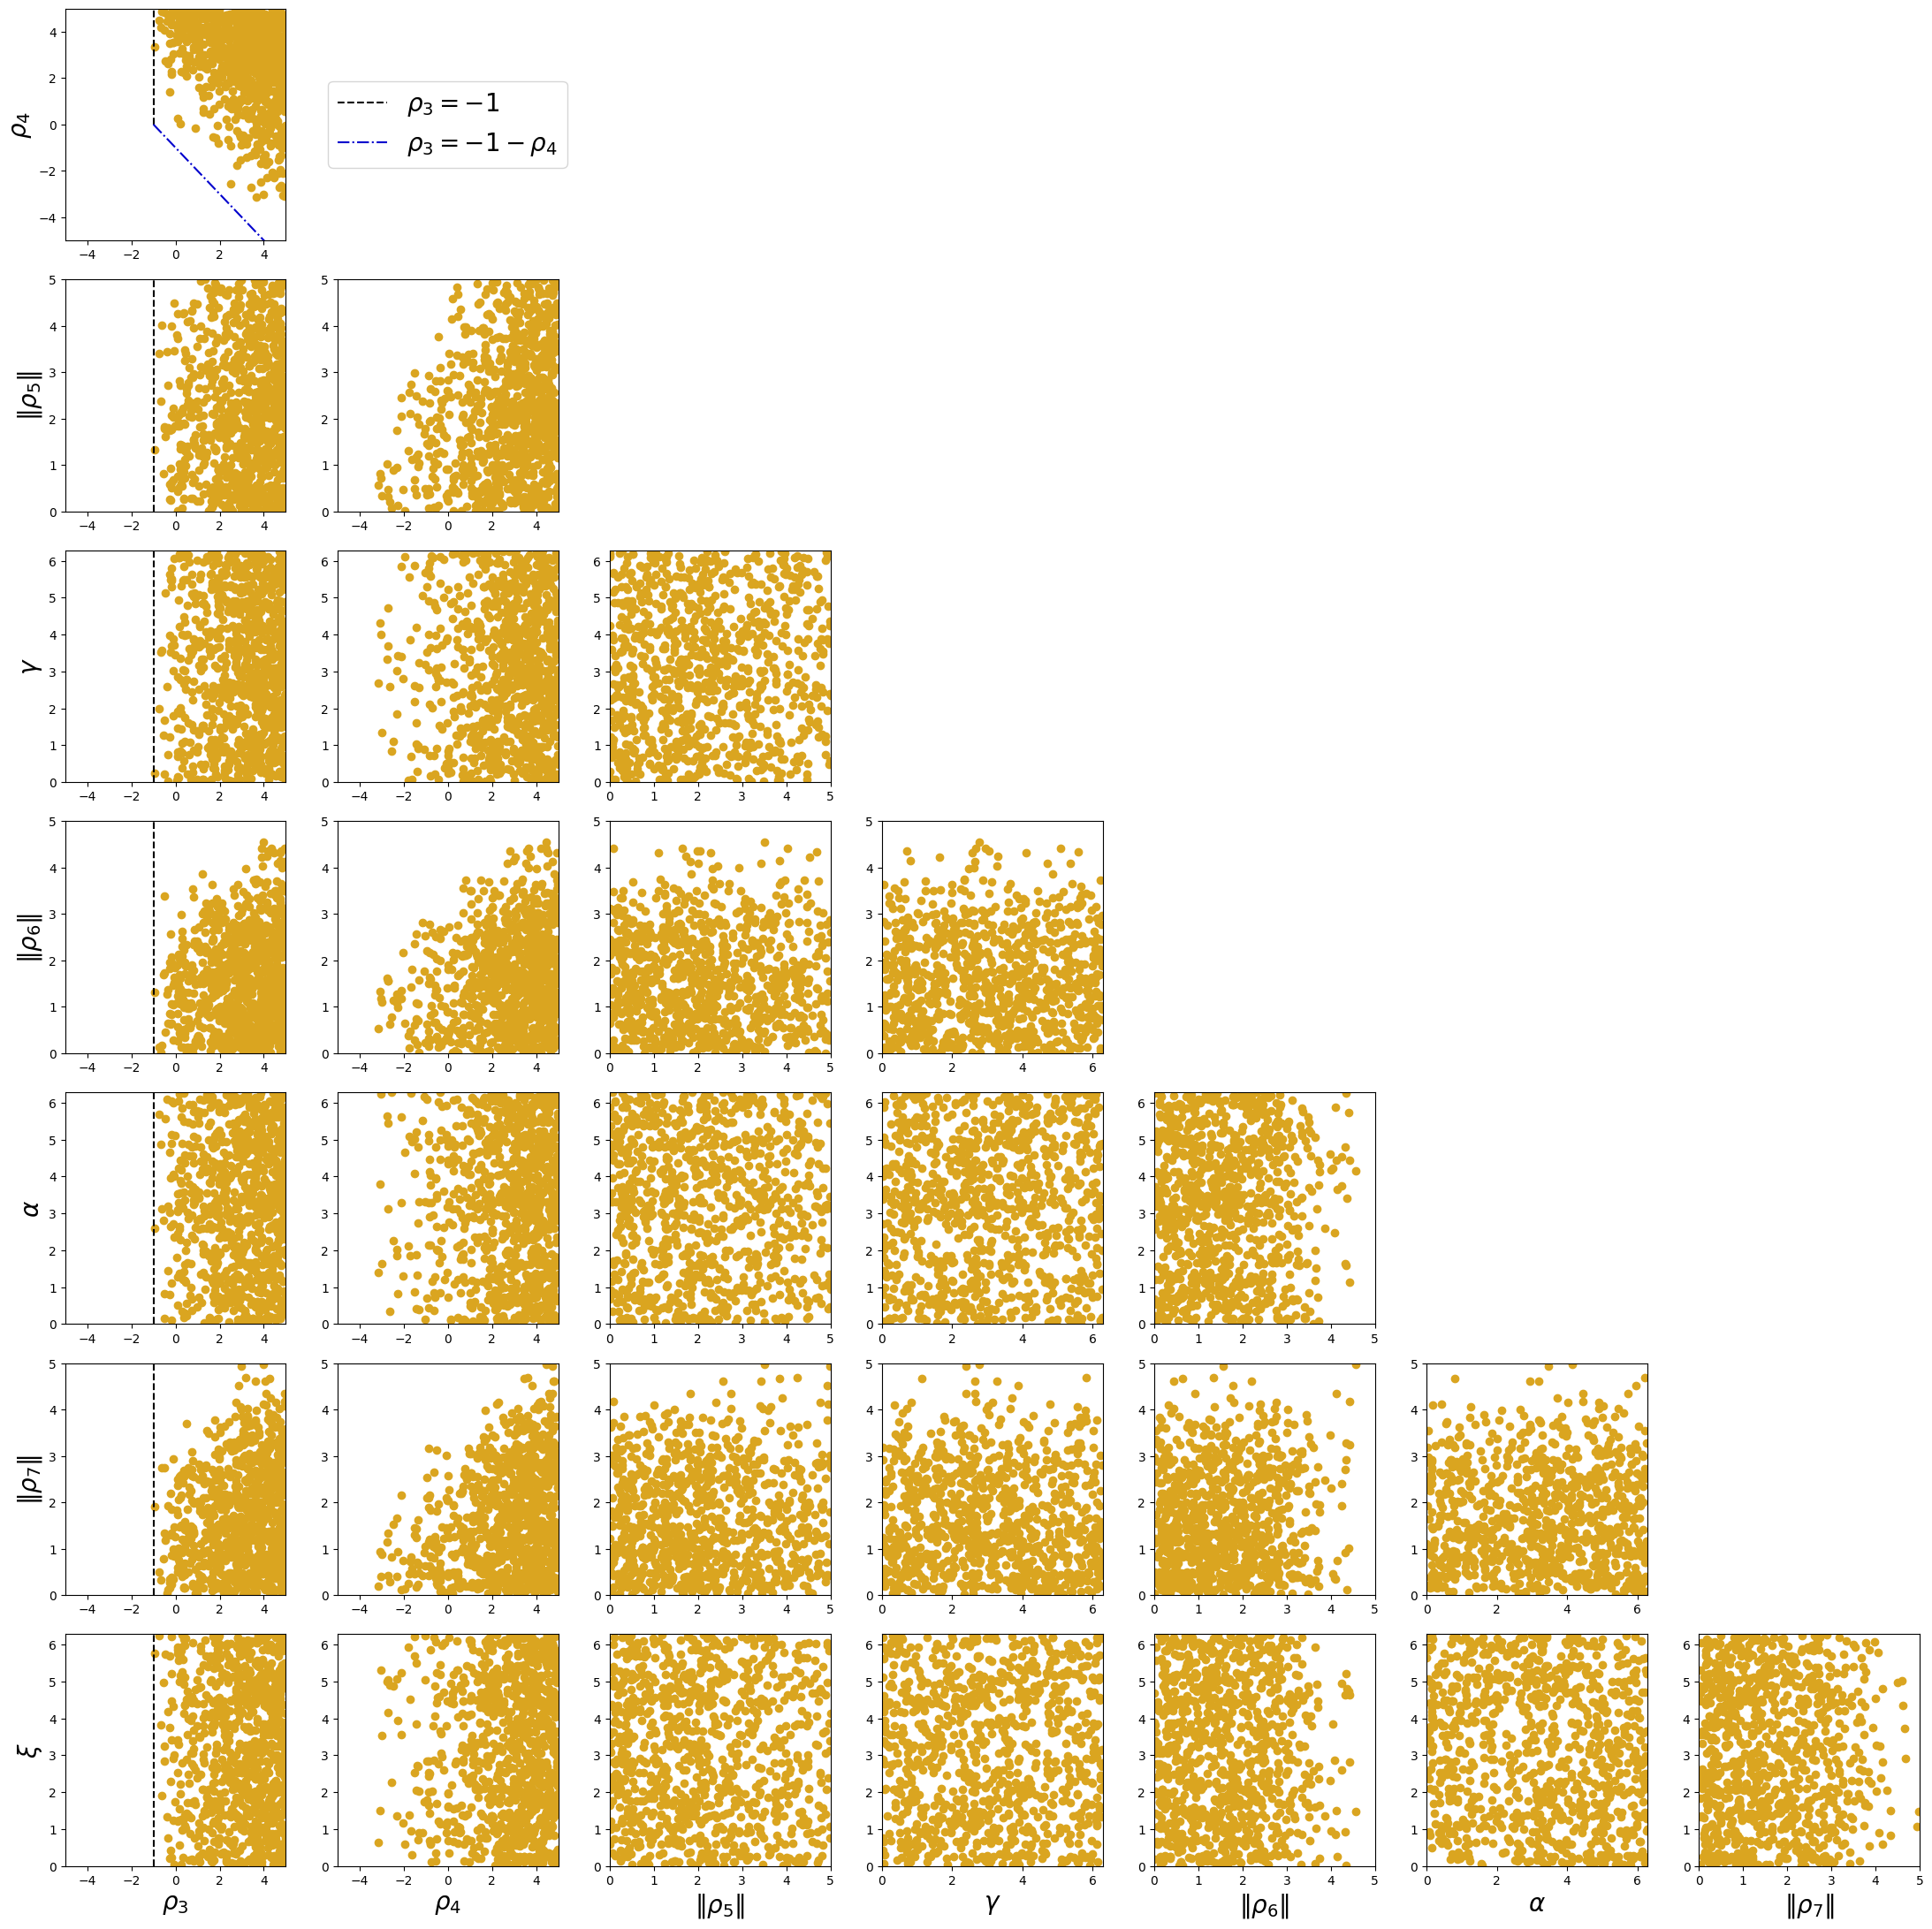

In [62]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,1], color='goldenrod')

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='mediumblue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,2],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,2],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,3],color='goldenrod')

ax.set_ylabel(r'$\gamma$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,3],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,3],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,4],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,4],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,4],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

ax.scatter(Z2_violating_valid_values[:,3], Z2_violating_valid_values[:,4],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

ax.scatter(Z2_violating_valid_values[:,3], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

ax.scatter(Z2_violating_valid_values[:,4], Z2_violating_valid_values[:,5],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

ax.scatter(Z2_violating_valid_values[:,3], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

ax.scatter(Z2_violating_valid_values[:,4], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

ax.scatter(Z2_violating_valid_values[:,5], Z2_violating_valid_values[:,6],color='goldenrod')

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

ax.scatter(Z2_violating_valid_values[:,0], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\xi$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

ax.scatter(Z2_violating_valid_values[:,1], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

ax.scatter(Z2_violating_valid_values[:,2], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

ax.scatter(Z2_violating_valid_values[:,3], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\gamma$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

ax.scatter(Z2_violating_valid_values[:,4], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

ax.scatter(Z2_violating_valid_values[:,5], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

ax.scatter(Z2_violating_valid_values[:,6], Z2_violating_valid_values[:,7],color='goldenrod')

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='mediumblue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()

In [ ]:
# Explore Z_2-violating 2HDM results with rho_3<-1 (these values are impossible in the 2HDM with Z_2 symmetry)

dim = 1000

regions = [(-10, -1),         # rho_3
           (-10, 10),         # rho_4
           (0, 10),          # |rho_5|
           (0, 2*np.pi),    # gamma
           (0, 10),          # |rho_6|
           (0, 2*np.pi),    # alpha
           (0, 10),          # |rho_7|
           (0, 2*np.pi)]    # xi

# Generate random parameters
parameters = generate_random_free_params(dim, regions)

# Minimize the function and filter the results with V > 0
results = np.array(minimize_dependent_params(parameters, function_variable_regions))
Z2_violating_negative_rho3_valid_value = results[results[:, -1] > 0]
Z2_violating_negative_rho3_valid_value

# The array is empty. Hence, no valid values have been found.

array([], shape=(0, 12), dtype=float64)

# Symmetric 2HDM potential 

In [ ]:
# Explore Symmetric Z_2-violating 2HDM results

dim = 1000
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) #rho_6 = rho_7 and alpha = xi in order to assure rho_eff_6 = rho_eff_7 (alpha and xi can differ by a multiple of 2*pi, but this fact has no impact on the following figures)
alpha = np.random.default_rng().uniform(0,2*np.pi,dim) #rho_6 = rho_7 and alpha = xi in order to assure rho_eff_6 = rho_eff_7 (alpha and xi can differ by a multiple of 2*pi, but this fact has no impact on the following figures)
rho_7 = rho_6
xi = alpha
#
symmetric_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
symmetric_valid_values

[[4.722711198460361,
  3.6414067003825465,
  3.7616862002261775,
  0.025334804325938036,
  1.1308492862654984,
  4.005825853384166,
  1.1308492862654984,
  4.005825853384166,
  1.7500945821539995],
 [2.458128376852539,
  3.3259698892558465,
  1.2749719521994596,
  2.0362020409289774,
  2.0383790646199955,
  4.7079019630274,
  2.0383790646199955,
  4.7079019630274,
  1.1819095530696235],
 [0.6022623527657736,
  1.0296123159733472,
  1.5243840760172551,
  2.7609500144457146,
  0.763091573833804,
  1.1623989896628681,
  0.763091573833804,
  1.1623989896628681,
  0.6071102008114752],
 [2.938291356128987,
  4.82690551583816,
  0.919868653086387,
  2.385579489679371,
  0.7603816625919446,
  0.5252875536487884,
  0.7603816625919446,
  0.5252875536487884,
  1.9176194245152565],
 [2.6228661438767373,
  3.7717306815150735,
  0.48720736079903404,
  5.800212165046466,
  2.7500085217646024,
  5.236196407084662,
  2.7500085217646024,
  5.236196407084662,
  0.5878168841065361],
 [3.8478236699881023,


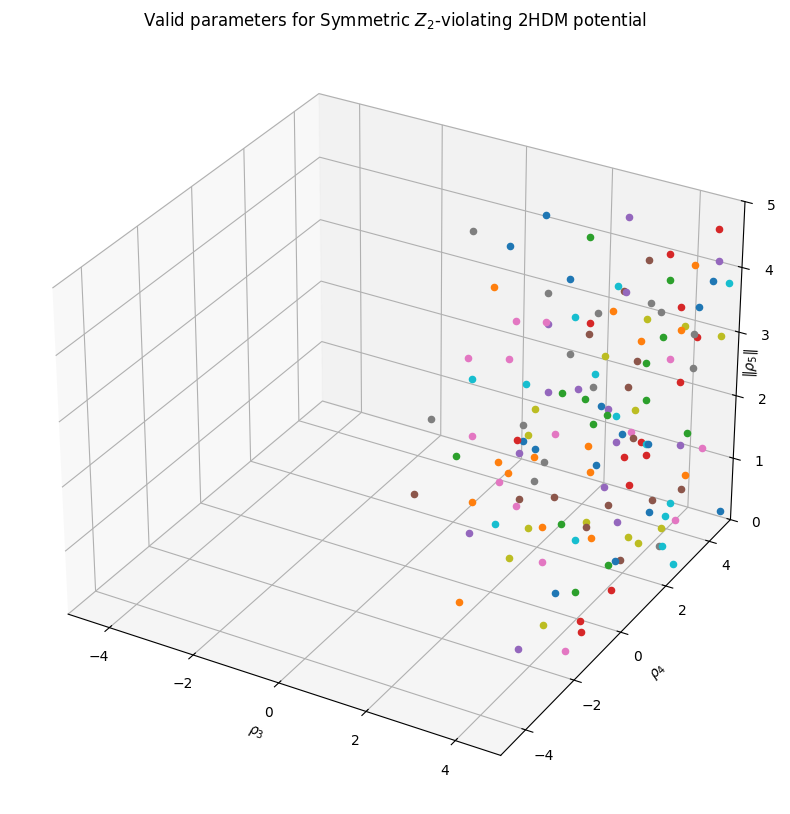

In [84]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(symmetric_valid_values)-1,len(symmetric_valid_values)):
    #
    ax.scatter(symmetric_valid_values[int(point)][0],symmetric_valid_values[int(point)][1],symmetric_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title(r'Valid parameters for Symmetric $Z_2$-violating 2HDM potential')

plt.show()

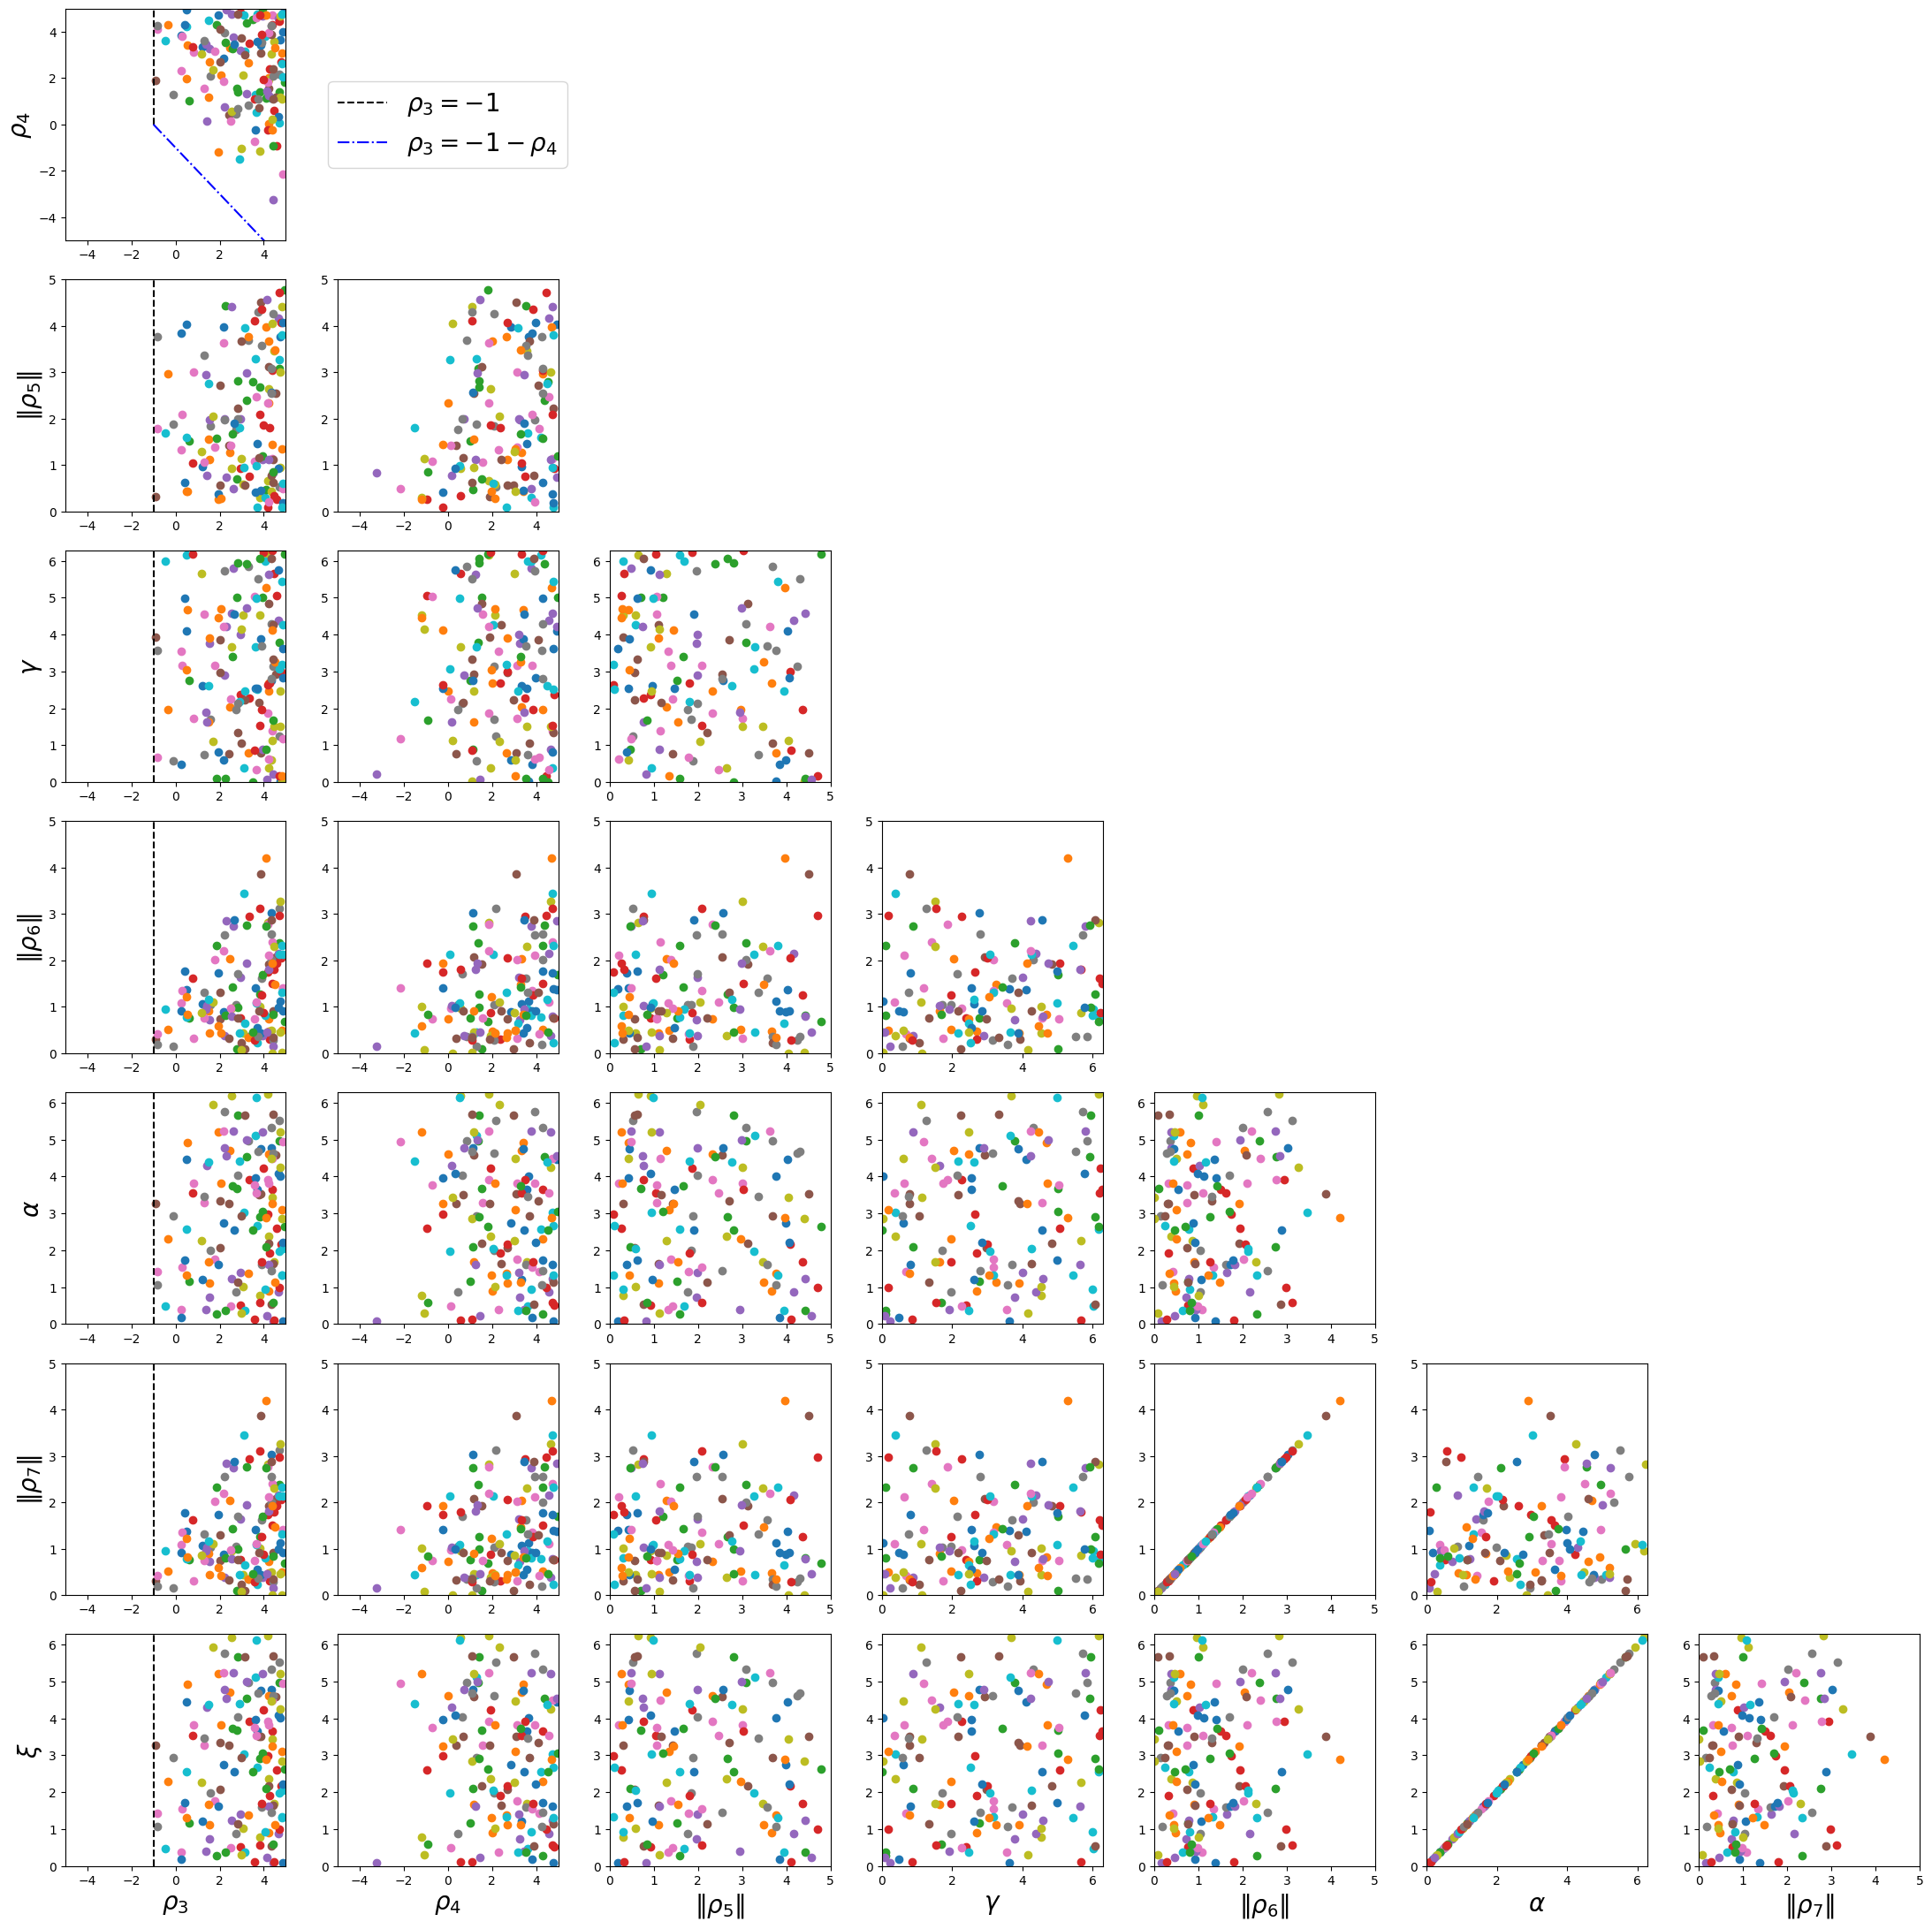

In [78]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][1])

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][2])

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][2])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][3])

ax.set_ylabel(r'$\gamma$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][3])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][3])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][4])

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][4])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][4])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][3], symmetric_valid_values[int(point)][4])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][3], symmetric_valid_values[int(point)][5])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][4], symmetric_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][6])

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][6])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][3], symmetric_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][4], symmetric_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][5], symmetric_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][0], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\xi$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][1], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][2], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][3], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\gamma$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][4], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][5], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

for point in np.linspace(0, len(symmetric_valid_values)-1, len(symmetric_valid_values)):
    ax.scatter(symmetric_valid_values[int(point)][6], symmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()

# Antisymmetric 2HDM potential

In [79]:
# Explore Symmetric Z_2-violating 2HDM results

dim = 1000
rho_3 = np.random.default_rng().uniform(-5,5,dim)
rho_4 = np.random.default_rng().uniform(-5,5,dim)
rho_5 = np.random.default_rng().uniform(0,5,dim) 
gamma = np.random.default_rng().uniform(0,2*np.pi,dim)
rho_6 = np.random.default_rng().uniform(0,5,dim) #rho_6 = rho_7 and xi = alpha + pi in order to assure rho_eff_6 + rho_eff_7 = 0 
alpha = np.random.default_rng().uniform(0,2*np.pi,dim) #rho_6 = rho_7 and alpha + pi in order to assure rho_eff_6 + rho_eff_7 = 0 
rho_7 = rho_6
xi = alpha + np.pi
#
antisymmetric_valid_values = search_minimum_values_for_Z2_violating_2HDM(rho_3,rho_4,rho_5,gamma,rho_6,alpha,rho_7,xi,dim,10**(-5))
antisymmetric_valid_values

[[3.5340437321191445,
  4.605512497765176,
  2.4073854075371153,
  0.7024660483134577,
  2.3335251616392365,
  0.2005337647915439,
  2.3335251616392365,
  3.342126418381337,
  1.4549497180142326],
 [2.3061258264541165,
  0.9431741004733087,
  3.19658871217905,
  5.468527982829311,
  0.6345823672764789,
  5.890255564739562,
  0.6345823672764789,
  9.031848218329355,
  1.0532822020394688],
 [2.7783242101128014,
  2.2324210939012286,
  3.061839113945995,
  0.8913328511923915,
  0.39719951546856924,
  1.1176187012446335,
  0.39719951546856924,
  4.259211354834426,
  1.9269895776302157],
 [2.4490698358880127,
  1.7198641607012979,
  1.4584882641360926,
  1.418265924725542,
  0.11249367049107506,
  0.5989006970729606,
  0.11249367049107506,
  3.740493350662754,
  2.0],
 [4.670391352640891,
  1.8215658681112892,
  4.543397484678956,
  3.6875523623046615,
  3.0010072254445577,
  1.9084652895193874,
  3.0010072254445577,
  5.050057943109181,
  1.161730058422902],
 [4.523986562136313,
  4.811005

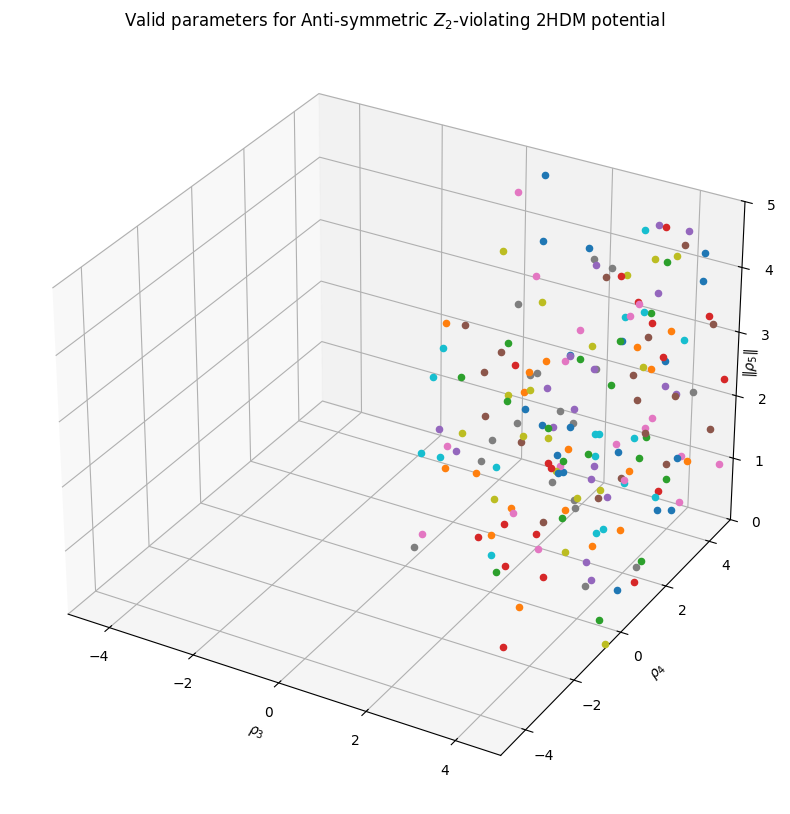

In [83]:
# Plot of the results
# Even though in this example all the parameters are studied at once, only the region rho_3, rho_4, rho_5 is shown.

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for point in np.linspace(0,len(antisymmetric_valid_values)-1,len(antisymmetric_valid_values)):
    #
    ax.scatter(antisymmetric_valid_values[int(point)][0],antisymmetric_valid_values[int(point)][1],antisymmetric_valid_values[int(point)][2])

ax.set_xlabel(r'$\rho_{3}$')
ax.set_ylabel(r'$\rho_{4}$')
ax.set_zlabel(r'$\|\rho_{5}\|$', rotation=90)
ax.zaxis.labelpad = -15.25
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
ax.set_zlim([0,5])
ax.set_title(r'Valid parameters for Anti-symmetric $Z_2$-violating 2HDM potential')

plt.show()

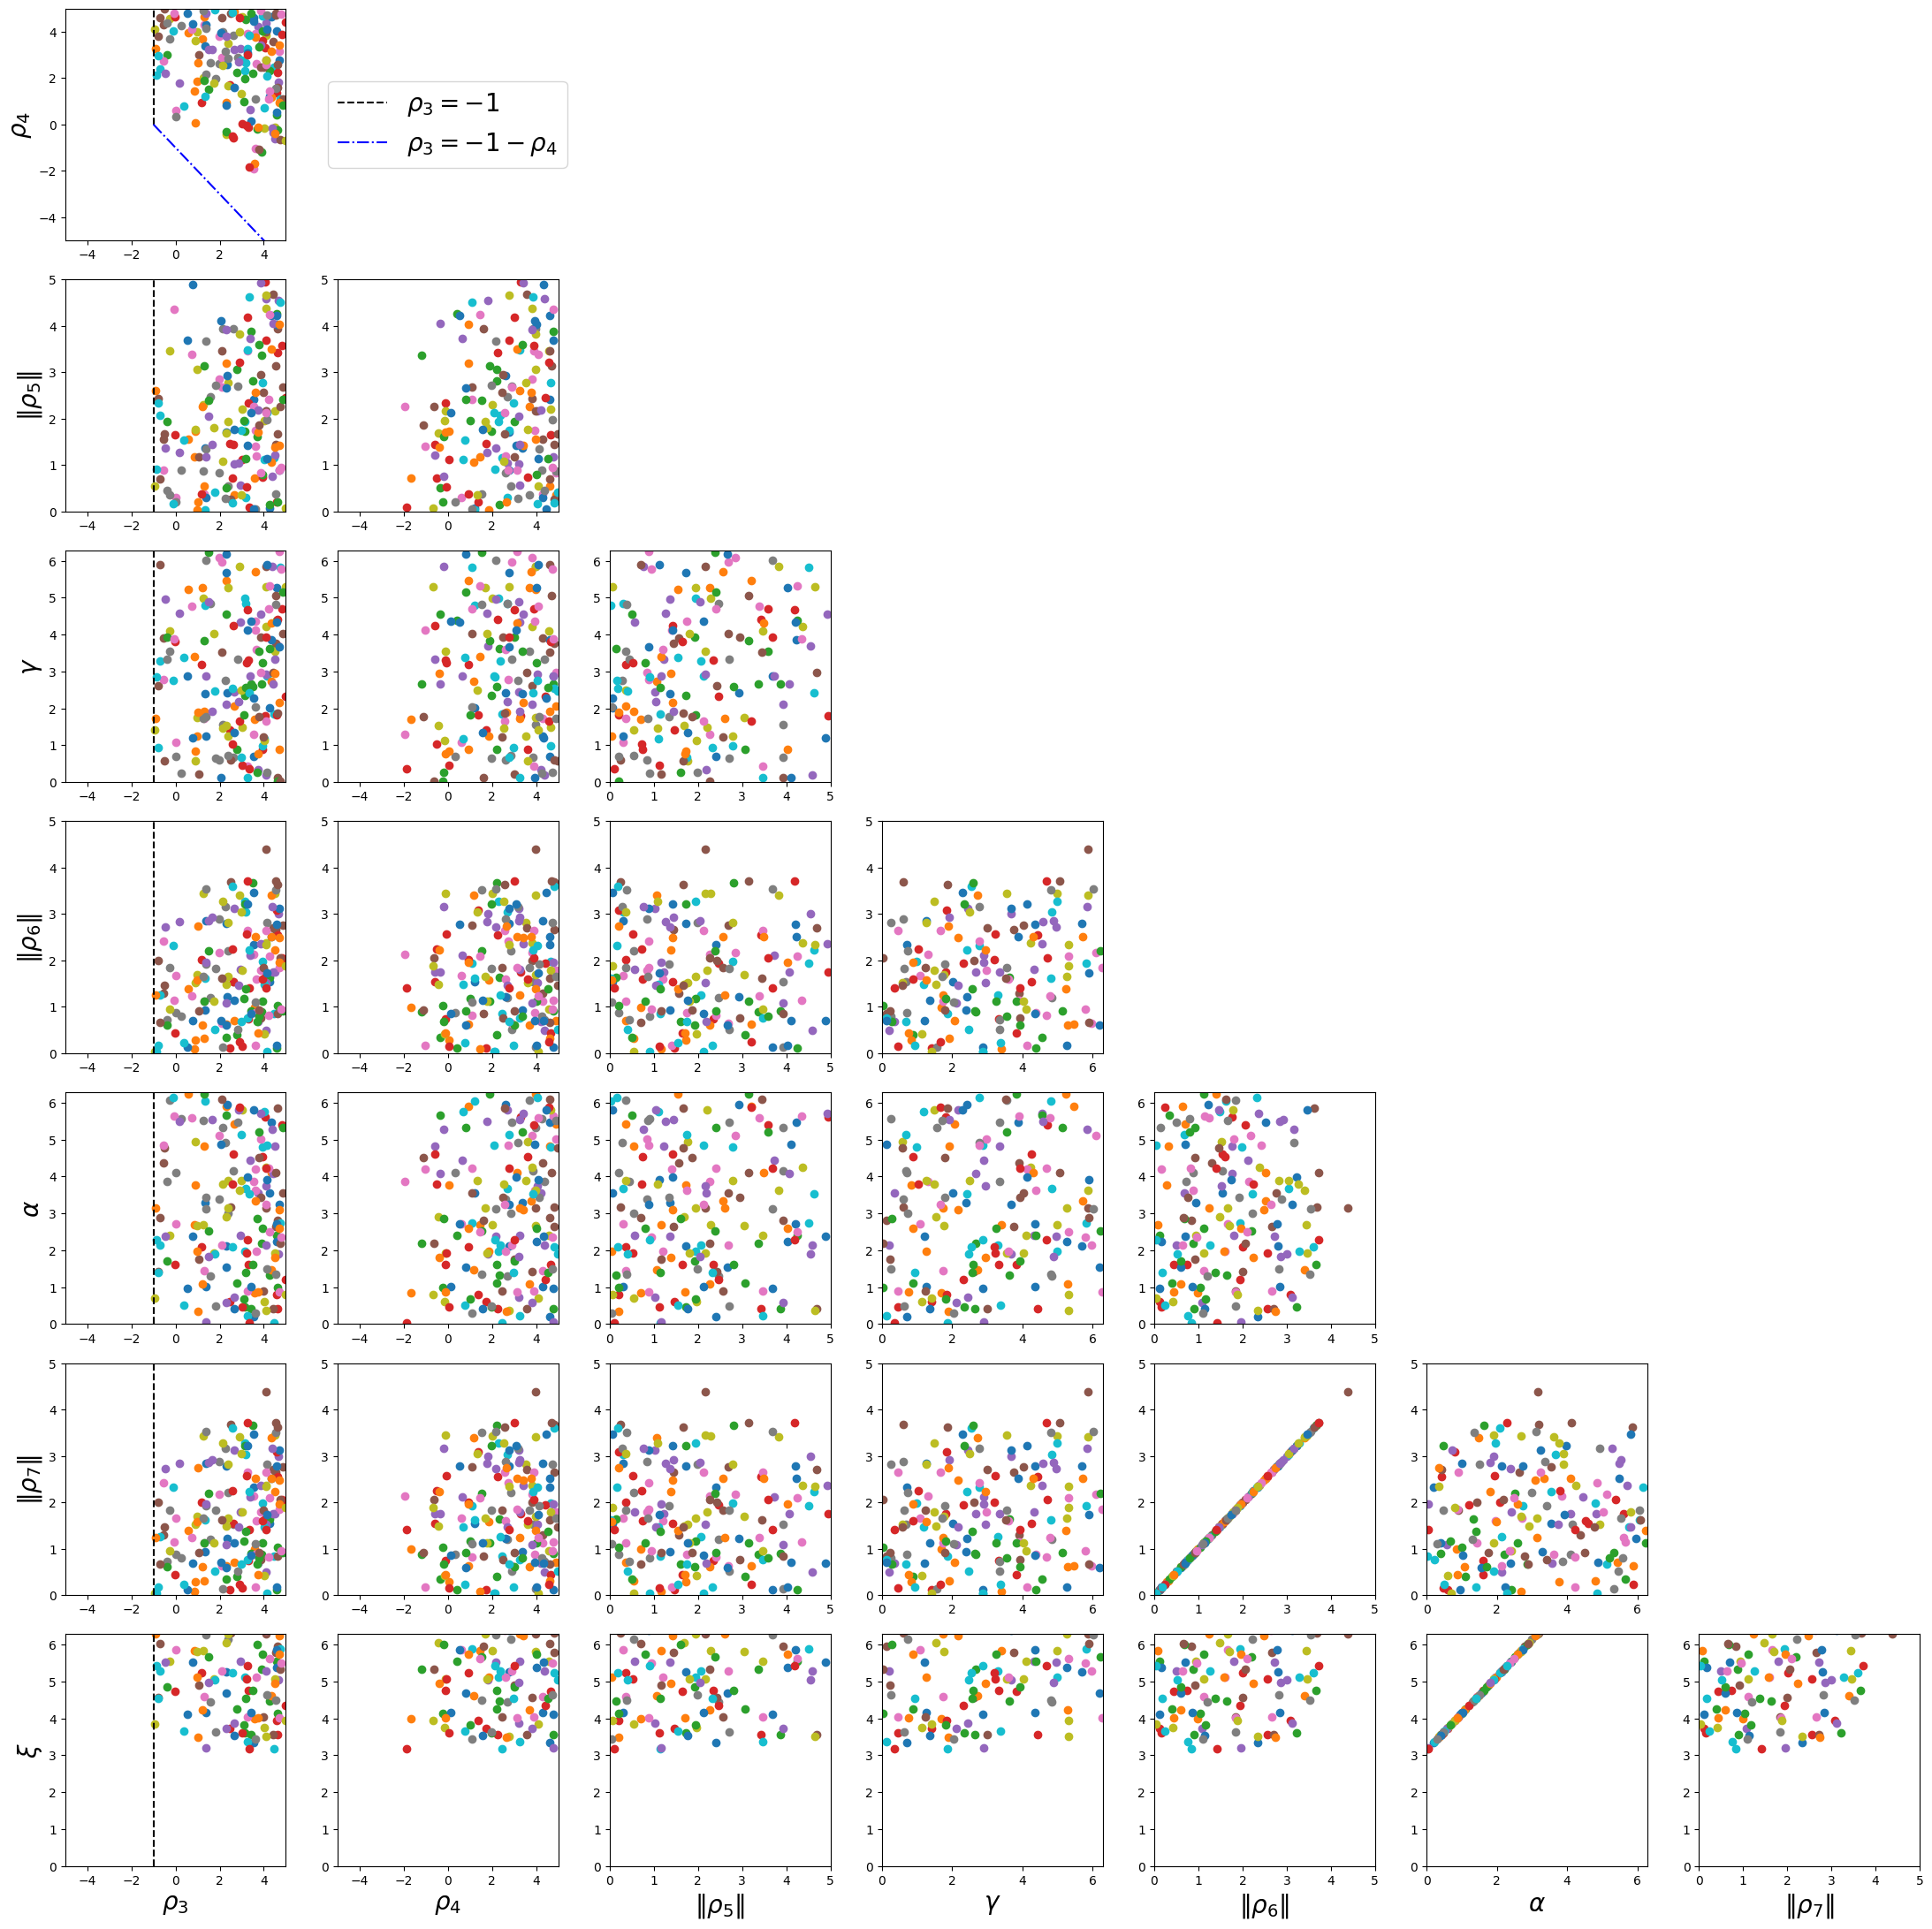

In [81]:
fig = plt.figure(figsize=(25,25))

ax = fig.add_subplot(8,8,9)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][1])

ax.set_ylabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')
plt.plot(np.linspace(-1,5,100),-1-np.linspace(-1,5,100),color='blue',linestyle='-.')

ax = fig.add_subplot(8,8,17)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][2])

ax.set_ylabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,18)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][2])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,25)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][3])

ax.set_ylabel(r'$\gamma$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,26)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][3])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,27)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][3])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,33)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][4])

ax.set_ylabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,34)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][4])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,35)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][4])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,36)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][3], antisymmetric_valid_values[int(point)][4])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,41)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
ax.set_ylabel(r'$\alpha$',fontsize=20)
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,42)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,43)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,44)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][3], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,45)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][4], antisymmetric_valid_values[int(point)][5])

ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,49)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][6])

ax.set_ylabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,5,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,50)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([-5, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,51)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,52)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][3], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,53)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][4], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,54)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][5], antisymmetric_valid_values[int(point)][6])

ax.set_xlim([0, 2*np.pi])
ax.set_ylim([0, 5])

ax = fig.add_subplot(8,8,57)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][0], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{3}$',fontsize=20)
ax.set_ylabel(r'$\xi$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])
plt.plot(np.linspace(-1,-1,100),np.linspace(0,2*np.pi,100),color='black',linestyle='--')

ax = fig.add_subplot(8,8,58)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][1], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\rho_{4}$',fontsize=20)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,59)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][2], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{5}\|$',fontsize=20)
ax.set_xlim([0, 5])
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,60)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][3], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\gamma$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,61)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][4], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{6}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,62)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][5], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xlim([0, 2*np.pi]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,63)

for point in np.linspace(0, len(antisymmetric_valid_values)-1, len(antisymmetric_valid_values)):
    ax.scatter(antisymmetric_valid_values[int(point)][6], antisymmetric_valid_values[int(point)][7])

ax.set_xlabel(r'$\|\rho_{7}\|$',fontsize=20)
ax.set_xlim([0, 5]) 
ax.set_ylim([0, 2*np.pi])

ax = fig.add_subplot(8,8,10)

plt.plot([],[],color='black',linestyle='--',label=r'$\rho_{3}=-1$')
plt.plot([],[],color='blue',linestyle='-.',label=r'$\rho_{3}=-1-\rho_{4}$')
plt.legend(loc='center', fontsize=20)
ax.axis('off')


plt.tight_layout()  
plt.show()